In [1]:
from lib import *
import torch.nn.functional as F

## Data

In [2]:
mean, std = calculate_mean_and_std_FMNIST()
train_data, test_data =  download_normalized_data_FMNIST(mean, std)

In [3]:
batch_size: int = 1000
    
# prepare data loaders, based on the already loaded datasets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

## Neural network model

In [4]:
class CustomNetwork(object):
    
    """
    Simple D-layer linear neural network 
    hidden_dims = topule(n0, n1, n2, ...nD)
    n0 = input layer
    n_D = output layer
    """
    
    def __init__(self, D, layers_dim):
        
        """
        Initialize network's weights according to Gaussian iid and network's biases with 0.0 values
        """
        
        self.weights = []
        self.biases = []
        
        self.D = len(layers_dim)-1
        assert self.D == D
        
        print("Depth of the network = number of hidden layers + 1:", D)
        
        for i in range(self.D):
            
            weight: torch.Tensor = torch.rand((layers_dim[i+1], layers_dim[i])) 
            bias: torch.Tensor = torch.zeros(layers_dim[i+1])  
            
            stdv = 2. / np.sqrt(layers_dim[i])
            
            weight = (weight-0.5)*stdv

            weight.requires_grad = True
            bias.requires_grad = True
            
            self.weights.append(weight)
            self.biases.append(bias)
       
            
    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network
        """

        for i in range(0,self.D):            
            x = torch.nn.functional.linear( input = x, weight=self.weights[i],bias=self.biases[i])
            x=torch.tanh(x)
        return x 
    
    
    
    def parameters(self) -> List[torch.Tensor]:
        """
        Returns all trainable parameters 
        """
        return self.weights+self.biases

In [5]:
input_dim = 784
output_dim = 10
hidden_dim1 = 50
hidden_dim2 = 50
hidden_dim3 = 50
hidden_dim4 = 50
D = 5

# initialize the model
model: CustomNetwork = CustomNetwork(D = D, layers_dim = (input_dim, hidden_dim1, hidden_dim2, hidden_dim3,hidden_dim4, output_dim))

Depth of the network = number of hidden layers + 1: 5


## Training parameters

In [6]:
# initialize the optimizer using the hyperparams below
lr: float = 0.005
momentum: float = 0.00
optimizer: torch.optim.Optimizer = SGD(params = model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
epoch: int = 800

## Training loop

In [ ]:
for e in range(300):   
    
    for inner_counter, (x, y) in enumerate(train_loader):        
        
        # reset the gradients from previouis iteration
        optimizer.zero_grad()

        # pass through the network
        
        output: torch.Tensor = model(x)  
        
        loss: torch.Tensor = criterion(output, y)

        # backward pass thorught the network
        loss.backward()

        # apply the gradients
        optimizer.step()     
        
    # add model parameters to tab
    loss_tab.append(loss.item())
    params_tab = []
    for param in model.parameters():
        params_tab.append(param.detach().numpy().flatten()  )
            
    w1_tab.append(params_tab[0])
    w2_tab.append(params_tab[1])
    w3_tab.append(params_tab[2])
    w4_tab.append(params_tab[3])
    w5_tab.append(params_tab[4])
    b1_tab.append(params_tab[5])
    b2_tab.append(params_tab[6])
    b3_tab.append(params_tab[7])
    b4_tab.append(params_tab[8])
    b5_tab.append(params_tab[9])
    
    w1_mean_tab.append(params_tab[0].mean())
    w2_mean_tab.append(params_tab[1].mean())
    w3_mean_tab.append(params_tab[2].mean())
    w4_mean_tab.append(params_tab[3].mean())
    w5_mean_tab.append(params_tab[4].mean())
    
    b1_mean_tab.append(params_tab[5].mean())
    b2_mean_tab.append(params_tab[6].mean())
    b3_mean_tab.append(params_tab[7].mean())
    b4_mean_tab.append(params_tab[8].mean())
    b5_mean_tab.append(params_tab[9].mean())
    
    w1_std_tab.append(params_tab[0].std())
    w2_std_tab.append(params_tab[1].std())
    w3_std_tab.append(params_tab[2].std())
    w4_std_tab.append(params_tab[3].std())
    w5_std_tab.append(params_tab[4].std())

    b1_std_tab.append(params_tab[5].std())
    b2_std_tab.append(params_tab[6].std())
    b3_std_tab.append(params_tab[7].std())
    b4_std_tab.append(params_tab[8].std())
    b5_std_tab.append(params_tab[9].std())
    
    # at the end of an epoch run evaluation on the test set
    with torch.no_grad():
        correct: int = 0 
        for i, (x, y) in enumerate(train_loader):
            # pass through the network            
            output: torch.Tensor = model(x)
            # update the number of correctly predicted examples
            pred_labels = torch.argmax(output, 1)
            correct += ( (pred_labels -y) ==0).sum()
        train_accuracy_tab.append( float(correct) / len(train_data))

        correct: int = 0 
        for i, (x, y) in enumerate(test_loader):
            # pass through the network            
            output: torch.Tensor = model(x)

            # update the number of correctly predicted examples
            pred_labels = torch.argmax(output, 1)
            correct += ( (pred_labels -y) ==0).sum()
        test_accuracy_tab.append( float(correct) / len(test_data))
            
    print(f"{e} \t train accuracy {train_accuracy_tab[-1]} \tTest accuracy: {test_accuracy_tab[-1]}")   

0 	 train accuracy 0.8044166666666667 	Test accuracy: 0.7775


In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))

axs[0].plot(loss_tab)
axs[1].plot(train_accuracy_tab, color='green')
axs[1].plot(test_accuracy_tab, color='red')

axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].grid(True)

axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].grid(True)

plt.show()

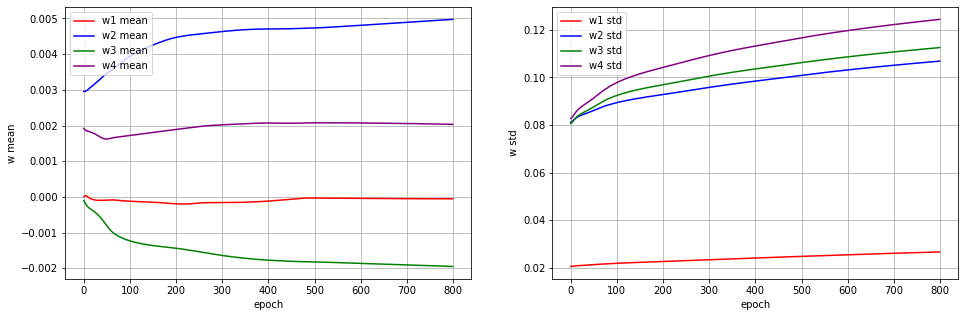

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))

axs[0].plot(w1_mean_tab, c='red', label = 'w1 mean')
axs[0].plot(w2_mean_tab, c='blue',label = 'w2 mean')
axs[0].plot(w3_mean_tab, c='green', label = 'w3 mean')
axs[0].plot(w4_mean_tab, c='purple', label = 'w4 mean')
#axs[0].plot(w5_mean_tab, c='pink', label = 'w5 mean')


axs[1].plot(w1_std_tab, color='red', label='w1 std')
axs[1].plot(w2_std_tab, color='blue', label='w2 std')
axs[1].plot(w3_std_tab, color='green', label='w3 std')
axs[1].plot(w4_std_tab, color='purple', label='w4 std')
#axs[1].plot(w5_std_tab, color='pink', label='w5 std')


axs[0].set_xlabel('epoch')
axs[0].set_ylabel('w mean')
axs[0].grid(True)
axs[0].legend()

axs[1].set_xlabel('epoch')
axs[1].set_ylabel('w std')
axs[1].grid(True)
axs[1].legend()

plt.show()

## Save generat time evolution

In [10]:
import pandas as pd

savefile = 'model_50_50_50_50_5.csv'
df = pd.DataFrame()

df['loss'] = loss_tab
df['train_accuracy'] = train_accuracy_tab
df['test_accuracy'] = test_accuracy_tab

df['w1_mean'] = w1_mean_tab
df['w1_std'] = w1_std_tab
df['w2_mean'] = w2_mean_tab
df['w2_std'] = w2_std_tab
df['w3_mean'] = w3_mean_tab
df['w3_std'] = w3_std_tab
df['w4_mean'] = w4_mean_tab
df['w4_std'] = w4_std_tab
df['w5_mean'] = w5_mean_tab
df['w5_std'] = w5_std_tab


df['b1_mean'] = b1_mean_tab
df['b1_std'] = b1_std_tab
df['b2_mean'] = b2_mean_tab
df['b2_std'] = b2_std_tab
df['b3_mean'] = b3_mean_tab
df['b3_std'] = b3_std_tab
df['b4_mean'] = b4_mean_tab
df['b4_std'] = b4_std_tab
df['b5_mean'] = b5_mean_tab
df['b5_std'] = b5_std_tab


df.to_csv(savefile, index=False)

## Save weight distribution

In [11]:
df_w2= pd.DataFrame(np.array(w2_tab).T)
df_w3= pd.DataFrame(np.array(w3_tab).T)
df_w4= pd.DataFrame(np.array(w4_tab).T)
df_w5= pd.DataFrame(np.array(w5_tab).T)

df_b2= pd.DataFrame(np.array(b2_tab).T)
df_b3= pd.DataFrame(np.array(b3_tab).T)
df_b4= pd.DataFrame(np.array(b4_tab).T)
df_b5= pd.DataFrame(np.array(b5_tab).T)


In [12]:
df_w2.to_csv('model_50_50_50_50_w2_5.csv', index=False)
df_w3.to_csv('model_50_50_50_50_w3_5.csv', index=False)
df_w4.to_csv('model_50_50_50_50_w4_5.csv', index=False)
df_w5.to_csv('model_50_50_50_50_w5_5.csv', index=False)

df_b2.to_csv('model_50_50_50_50_b2_5.csv', index=False)
df_b3.to_csv('model_50_50_50_50_b3_5.csv', index=False)
df_b4.to_csv('model_50_50_50_50_b4_5.csv', index=False)
df_b5.to_csv('model_50_50_50_50_b5_5.csv', index=False)


## Save model parameters

In [14]:
w1=deepcopy(model.parameters()[0]).detach().numpy().reshape(input_dim*hidden_dim1)
w2=deepcopy(model.parameters()[1]).detach().numpy().reshape(hidden_dim1*hidden_dim2)
w3=deepcopy(model.parameters()[2]).detach().numpy().reshape(hidden_dim2*hidden_dim3)
w4=deepcopy(model.parameters()[3]).detach().numpy().reshape(hidden_dim3*hidden_dim4)
w5=deepcopy(model.parameters()[4]).detach().numpy().reshape(hidden_dim4*output_dim)

b1=deepcopy(model.parameters()[5]).detach().numpy()
b2=deepcopy(model.parameters()[6]).detach().numpy()
b3=deepcopy(model.parameters()[7]).detach().numpy()
b4=deepcopy(model.parameters()[8]).detach().numpy()
b5=deepcopy(model.parameters()[9]).detach().numpy()


df_w1 = pd.DataFrame(w1, columns = ['w1'] )
df_w2 = pd.DataFrame(w2, columns = ['w2'] )
df_w3 = pd.DataFrame(w3, columns = ['w3'] )
df_w4 = pd.DataFrame(w4, columns = ['w4'] )
df_w5 = pd.DataFrame(w5, columns = ['w5'] )


df_b1 = pd.DataFrame(b1, columns = ['b1'] )
df_b2 = pd.DataFrame(b2, columns = ['b2'] )
df_b3 = pd.DataFrame(b3, columns = ['b3'] )
df_b4 = pd.DataFrame(b4, columns = ['b4'] )
df_b5 = pd.DataFrame(b5, columns = ['b5'] )


df_w1.to_csv('w1.csv', index=False)
df_w2.to_csv('w2.csv', index=False)
df_w3.to_csv('w3.csv', index=False)
df_w4.to_csv('w4.csv', index=False)
df_w5.to_csv('w5.csv', index=False)

df_b1.to_csv('b1.csv', index=False)
df_b2.to_csv('b2.csv', index=False)
df_b3.to_csv('b3.csv', index=False)
df_b4.to_csv('b4.csv', index=False)
df_b5.to_csv('b5.csv', index=False)
